In [270]:
import numpy as np
import pandas as pd

In [271]:
df = pd.read_csv('/Users/harshsanjayshah/Downloads/spam.csv',encoding='latin1')

In [272]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [273]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5543,ham,U still havent got urself a jacket ah?,NaN,NaN,NaN
1492,ham,In the end she might still vomit but its okay....,NaN,NaN,NaN
413,ham,Bring home some Wendy =D,NaN,NaN,NaN
2116,ham,"It's that time of the week again, ryan",NaN,NaN,NaN
3411,ham,No she didnt. I will search online and let you...,NaN,NaN,NaN


In [274]:
df.shape

(5572, 5)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [276]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1, inplace=True)

In [277]:
df.sample(1)

,v1,v2
573,ham,Waiting for your call.


In [278]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [279]:
from sklearn.preprocessing import LabelEncoder

In [280]:
le = LabelEncoder()

In [281]:
df.target= le.fit_transform(df.target)

In [282]:
df.sample(1)

,target,text
3061,0,Fine. Do you remember me.


In [283]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [284]:
df.duplicated().sum()

403

In [285]:
df = df.drop_duplicates(keep='first')

## Data Exploration

In [286]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

In [287]:
import matplotlib.pyplot as plt

In [288]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

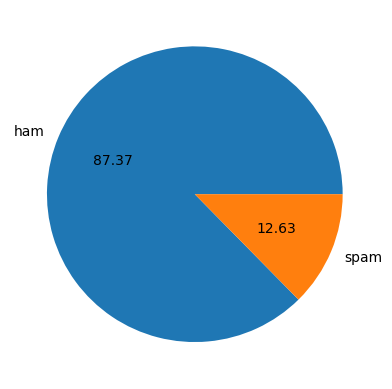

In [289]:
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [290]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshsanjayshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [291]:
df['num_character'] =  df.text.apply(len)

In [292]:
df.head(1)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111


In [293]:
df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [294]:
df.head(1)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [295]:
df['sentence'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [296]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [297]:
#ham
df[df['target'] == 0][['num_character', 'num_words', 'sentence']].describe()


,num_character,num_words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [298]:
#spam
df[df.target == 1][['num_character', 'num_words', 'sentence']].describe()

,num_character,num_words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [299]:
import seaborn as sns

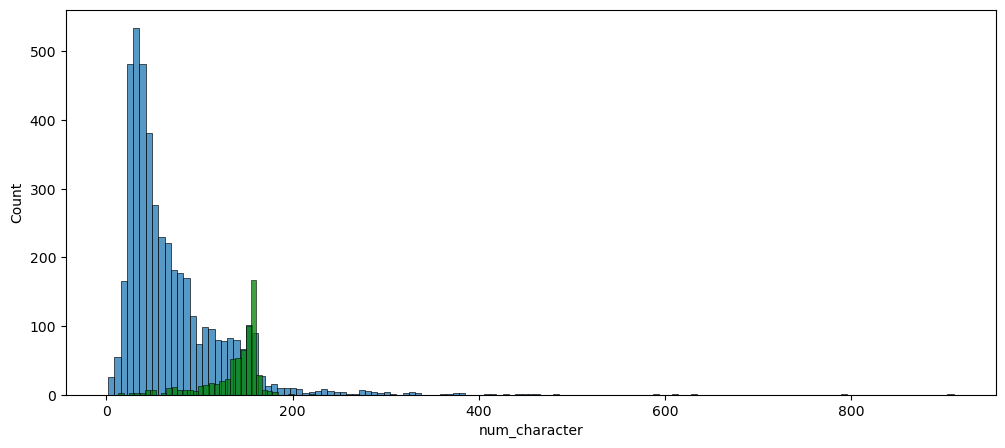

In [300]:
plt.figure(figsize=(12,5))
sns.histplot(df[df.target == 0]['num_character'])
sns.histplot(df[df.target == 1]['num_character'],color='green');

Here, we can see that spam messages length is more compare to normal one.

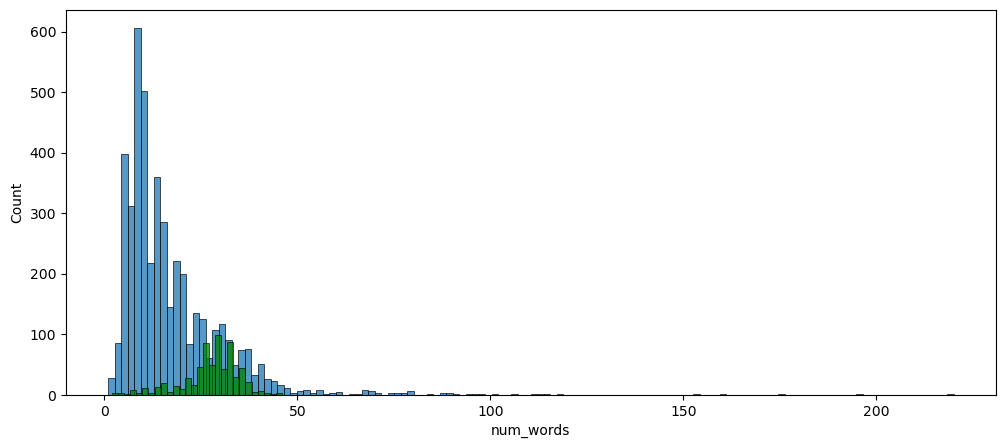

In [301]:
plt.figure(figsize=(12,5))
sns.histplot(df[df.target == 0]['num_words'])
sns.histplot(df[df.target == 1]['num_words'],color='green');

<AxesSubplot:>

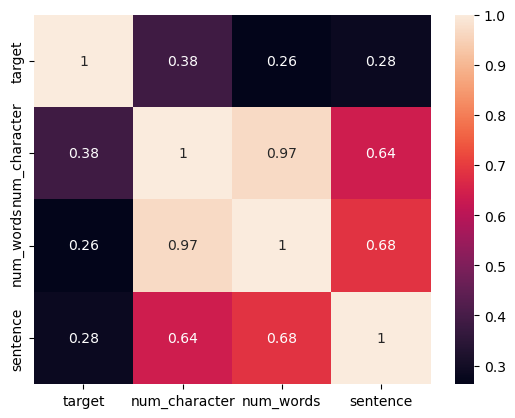

In [302]:
sns.heatmap(df.corr(),annot=True)

## Text Preprocessing

In [303]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [304]:
# Set in lowercase
df['text'] = df.text.apply(lambda x:x.lower())

In [305]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,"go until jurong point, crazy.. available only ...",111,24,2


In [306]:
# set in word tokenizer
df['text'] = df.text.apply(lambda x:nltk.word_tokenize(x))

In [307]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,"[go, until, jurong, point, ,, crazy, .., avail...",111,24,2


In [308]:
# remove special character
df['text'] = df['text'].apply(lambda x: [char for char in x if str(char).isalnum()])

In [309]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,"[go, until, jurong, point, crazy, available, o...",111,24,2


In [310]:
from nltk.corpus import stopwords

In [311]:
from string import punctuation

In [312]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshsanjayshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [313]:
# remove the stopwords and punctuations
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

In [314]:
df.text

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, pound, prize...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

In [315]:
# remove the stemming words

from nltk.stem.porter import PorterStemmer

In [316]:
ps = PorterStemmer()

In [317]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))

In [318]:
df.head(1)

,target,text,num_character,num_words,sentence
0,0,go jurong point crazi avail bugi n great world...,111,24,2


In [319]:
df.text

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [320]:
from wordcloud import WordCloud

In [321]:
# Create a WordCloud object
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

# Concatenate text for target == 1
text_for_target_1 = df[df.target == 1]['text'].str.cat(sep=" ")

In [322]:
span_wc = wc.generate(text_for_target_1)

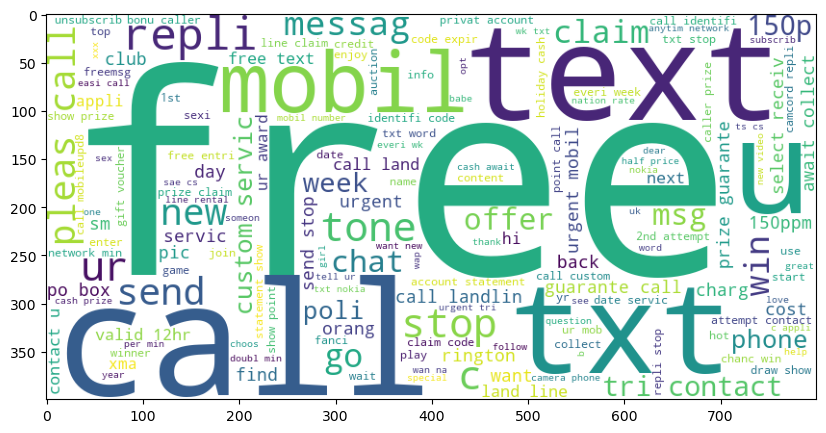

In [323]:
# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(span_wc);

In [324]:
spam_corpus =[]
for msg in df[df['target'] ==1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [325]:
len(spam_corpus)

9939

In [326]:
from collections import Counter

In [327]:
Counter(spam_corpus).most_common(15)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64)]

In [328]:
no_spam_corpus =[]
for msg in df[df['target']==0]['text'].tolist():
    
    for word in msg.split():
        no_spam_corpus.append(word)

In [329]:
len(no_spam_corpus)

35394

In [330]:
from collections import Counter
Counter(no_spam_corpus).most_common(15)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213)]

# Model Building

In [331]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [332]:
tf = TfidfVectorizer()

In [333]:
X = tf.fit_transform(df.text).toarray()

In [334]:
X.shape

(5169, 6708)

In [335]:
y = df.target.values

In [336]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Machine Learning

In [339]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [340]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [341]:
gb.fit(X_train,y_train)

GaussianNB()

In [342]:
mb.fit(X_train,y_train)

MultinomialNB()

In [343]:
bb.fit(X_train,y_train)


BernoulliNB()

In [344]:
y_pred1 = gb.predict(X_test)

In [345]:
y_pred2 = mb.predict(X_test)

In [346]:
y_pred3 = bb.predict(X_test)

In [347]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [348]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [349]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [351]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [352]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [353]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [354]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df
